# 1. Source Code
***

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os

from PIL import Image
import glob

In [133]:
# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장하는 함수입니다.
def resize_images(img_path):
    images = glob.glob(img_path + "/*.jpg")  
    
    print(len(images), " images to be resized.")

    target_size = (36, 36)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.ANTIALIAS)
        new_img.save(img, "JPEG")
    
    print(len(images), " images resized.")

In [134]:
# data 를 load 하는 함수입니다.
# imgs matrix 에 img 를 추가하고, labels matrix 에 y_data 을 추가합니다. 
# y_data 는 다음과 같습니다. (가위 : 0, 바위 : 1, 보 : 2)
def load_data(img_path, number_of_data=300):
    img_size = 36
    color = 3
    
    imgs = np.zeros(number_of_data*img_size*img_size*color, dtype=np.int32).reshape(number_of_data, img_size, img_size, color)
    labels = np.zeros(number_of_data, dtype=np.int32)

    idx = 0
    for file in glob.iglob(img_path + '/scissor/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 0   # 가위 : 0
        idx = idx + 1

    for file in glob.iglob(img_path + '/rock/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 1   # 바위 : 1
        idx = idx + 1
    
    for file in glob.iglob(img_path + '/paper/*.jpg'):
        img = np.array(Image.open(file), dtype=np.int32)
        imgs[idx,:,:,:] = img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx] = 2   # 보 : 2
        idx = idx + 1
        
    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [135]:
# 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들입니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/scissor"
# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [136]:
# load_data() 함수로 만들어진 imgs 를 x_train 에, labels 를 y_train 에 각각 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper"
(x_train, y_train) = load_data(image_dir_path)

# 입력 데이터는 0 ~ 255 의 값이므로, 255 로 나눠주어 0 ~ 1 사이의 값으로 정규화합니다.
x_train_norm = x_train / 255.0

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 36, 36, 3)
y_train shape: (300,)


라벨:  0


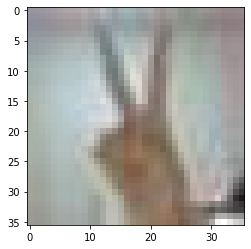

In [137]:
# train data 의 test code 입니다.
plt.imshow(x_train[70])
print('라벨: ', y_train[70])

In [138]:
# Deep Learning Network Model
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(40, (3, 3), activation='relu', input_shape=(36, 36, 3)))
model.add(keras.layers.MaxPool2D(2, 2))
model.add(keras.layers.Conv2D(60, (3, 3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(40, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

model.summary()

Model에 추가된 Layer 개수:  7
Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 34, 34, 40)        1120      
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 17, 17, 40)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 15, 15, 60)        21660     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 7, 7, 60)          0         
_________________________________________________________________
flatten_18 (Flatten)         (None, 2940)              0         
_________________________________________________________________
dense_36 (Dense)             (None, 40)                117640    
_________________________________________________________________
dense_37 (Dense)             

In [161]:
# Training
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5895e-09 - accuracy: 1.0000
Epoch 2/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 3/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 4/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 5/10
10/10 [==============================] - 0s 3ms/step - loss: 3.9736e-10 - accuracy: 1.0000
Epoch 6/10
10/10 [==============================] - 0s 4ms/step - loss: 1.1921e-09 - accuracy: 1.0000
Epoch 7/10
10/10 [==============================] - 0s 3ms/step - loss: 1.5895e-09 - accuracy: 1.0000
Epoch 8/10
10/10 [==============================] - 0s 3ms/step - loss: 7.9473e-10 - accuracy: 1.0000
Epoch 9/10
10/10 [==============================] - 0s 3ms/step - loss: 1.9868e-09 - accuracy: 1.0000
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 1.1921e-0

In [140]:
# 학습이 끝난 모델의 성능을 측정하기 위해 Test data set 을 생성합니다.
# x_test, y_test를 만드는 방법은 x_train, y_train을 만드는 방법과 유사합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/rock"

# 파일마다 모두 36 x 36 사이즈로 바꾸어 저장합니다.
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/paper"
resize_images(image_dir_path)
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test/scissor"
resize_images(image_dir_path)

# load_data() 함수로 만들어진 imgs 를 x_test 에, labels 를 y_test 에 각각 저장합니다.
image_dir_path = os.getenv("HOME") + "/aiffel/rock_scissor_paper/test"
(x_test, y_test)=load_data(image_dir_path)

# 입력 데이터는 0 ~ 255 의 값이므로, 255 로 나눠주어 0 ~ 1 사이의 값으로 정규화합니다.
x_test_norm = x_test / 255.0

print("x_test shape: {}".format(x_test_norm.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
100  images to be resized.
100  images resized.
학습데이터(x_train)의 이미지 개수는 300 입니다.
x_test shape: (300, 36, 36, 3)
y_test shape: (300,)


라벨:  0


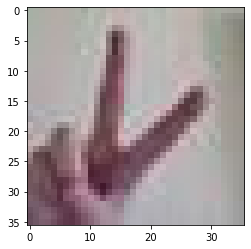

In [141]:
# # test data set 의 test code 입니다.
plt.imshow(x_test_norm[70])
print('라벨: ', y_test[70])

In [162]:
# evaluate 의 인자로 test data set 을 넣어 모델의 성능을 평가합니다.
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - loss: 2.6256 - accuracy: 0.7300
test_loss: 2.6256463527679443 
test_accuracy: 0.7300000190734863


# 2. Retrospection
***

<h2 style="font-style:italic">2022.01.04 - [E-01]RockPaperScissor Project</h2>

> 첫 딥러닝 프로젝트를 우여곡절 끝에 완성해내었다. 
<br>지금부터는 해당 프로젝트를 진행하면서 어려웠던 점들과 알게된 점, 부족한 점들에 대해 회고해보도록 하겠다.

***

* <h3 style="font-weight:bold">어려웠던 점</h3>
<br>
1. 데이터<br>
<br>- 가장 어려웠던 점은 바로 데이터가 아니었을까 싶다. 처음에 가위바위보 이미지를 웹캠으로 직접 찍어 입력 데이터로 활용한다는 점은 굉장히 낯설고 새로웠다. 이전에 깔짝대던 회귀나 분류 모델들은 대부분 앉은 자리에서 금방 만들어낼 수 있는 수치 데이터를 주로 활용해왔지만, 처음 접한 이미지 분류 모델에서조차 내가 직접 만들어낸 이미지를 데이터로 활용한다는 사실은 프로젝트에 대한 나의 막연한 두려움을 해소해주었다. 물론, 모델의 성능 평가 이전까지만이다.<br>
<br>- 모델이 학습을 완료하고 test data 로 성능을 평가한 직후, 나는 익히 들어왔던 선구자들의 명언을 떠올리게 되었다. 'Garbage In Garbage Out'. 모델의 loss 는 10점대로 치솟고, accuracy 는 0.3을 웃돌고 있던 것이었다. 물론 처음에는 온갖 하이퍼파라미터값을 바꿔보며 팔딱거렸다. 내 웹캠으로 정성들여 찍어낸 나의 손가락들이 문제의 원인일리는 없다는 듯이 말이다. 하지만 이내, 같은 팀원들의 사진을 보고나서, 나는 내 데이터에 대한 문제의식을 갖게 되었다. 파악된 내 데이터에 대한 문제점은 다음과 같이 크게 두 가지였다.<br>
<br>(1) 손이 너무 작게 찍혀, 픽셀을 (28x28)로 줄이는 과정에서 크게 뭉개진다.
<br>(2) 사진의 각도가 너무 다양해 training 에 어려움이 있다.<br>
<br>- 따라서, 나는 위와 같은 문제점들을 다음과 같이 해결하기로 결정했다.<br>
<br>(1) 입력 데이터를 다른 사람의 데이터로 바꾼다.
<br>(2) 입력 데이터의 픽셀을 (36x36)으로 줄인다.<br>
<br> 즉, 정성들여 찍은 나의 데이터는 아쉽지만 다른 사람의 데이터로 대체하기로 했다. 사진을 모두 새로 찍기에는 시간이 부족했으며, 생각해보면 굳이 다른 사람의 데이터를 사용하지 말아야할 이유가 없었다.<br>
또한, 다른 사람의 데이터에도 손이 굉장히 작게 찍혀 인식이 어려운 데이터들이 있을 수 있었다. 따라서, 입력데이터의 크기 (28x28) 에서 (36x36)으로 변경하기로 했다. 픽셀 수가 많아지면서 이전보다는 확실히 알아보기 쉬운 데이터가 되었고, 결론적으로 이는 모델의 성능이 0.7 까지 향상되는데에 큰 도움이 되었다.
<br>
<br>
2. 하이퍼파라미터와 성능<br>
<br>-다음으로 내 발목을 잡은 것은 하이퍼파라미터와 성능의 관계였다. 많은 학생들이 하이퍼파라미터와 성능의 관계에 대해 어려움을 겪을 것이라 예상했던만큼, 나 또한 그랬다. 딥러닝을 처음 다뤄본 나는 Conv2D 나 MaxPool2D, Flatten 과 Dense 등 다양한 계층에 대해 잘 알지 못했다. 그래서 각 계층을 모델에 추가하는 코드의 파라미터에 어떠한 값을 넣어야 하는지 감조차 서지 않았다. 각 계층이 하는 일에 대해 구글링을 해보긴 했지만, 장님이 코끼리 다리를 만지는 것과 같은 생각이 들어 직접 하나씩 바꿔보기로 했다. 처음에는 이미 알고 있어 익숙했던 개념인 에포크를 조작했다. 에포크를 늘려가면서 loss 와 accuracy 의 증감을 지켜보았고, 어느 정도 적정선의 에포크를 찾아내었다. 그 후, Conv2D의 첫 번째 파라미터 값을 증가시켰다. 이미지에서 더 많은 수의 특징을 잡아내기 위함이었다. 이후, MaxPool2D와 Dense 계층의 값도 서서히 조정하면서 모델의 성능을 천천히 잡아갔다. 마지막으로 에포크도 다시 조정했다. 물론, 입력 데이터의 한계 때문인지 0.8 에서 0.9 의 accuracy 를 보여주지는 못했지만, 확실히 모델의 성능은 좋아지고 있었다. 0.6 에서 0.7 의 accuracy 가 나와주고 있었던 것이다. 딥러닝을 활용한 첫 이미지 분류기의 성능은 비록 만족스럽지는 못했지만, 각 계층의 파라미터와 에포크가 늘어난다고 해서 모델의 성능이 1.0 에 수렴하지는 않는다는 사실을 알게 된 유의미한 시간이었다.
***

* <h3 style="font-weight:bold">알아낸 점</h3>
<br>
1. numpy<br>
<br>- 이번 프로젝트를 진행하면서 numpy 의 힘을 체감하게 되었다. 다른 간단한 회귀모델이나 분류모델은 물론이고, 이미지까지도 numpy의 ndarray로 표현이 가능했다. 심지어 복잡한 계산을 거치지도 않았다. 그저 ndarray 를 생성하는 파라미터에 이미지를 넣었을 뿐이었다. depth를 1 과 3 으로 조정하면서 컬러와 흑백 사진을 표현하는 것 까지도 가능했다. 어쩌면, 실세계의 존재하는 수많은 현상들과 객체들을 모두 ndarray의 행렬로 표현할 수 있지 않을까하는 생각도 들었다.<br>
<br>
2. python<br>
<br>- 1번과 연결되는 내용이다. 바로 머신러닝과 딥러닝을 구현하는데 python 을 사용하는 이유였다. python 이 다양한 라이브러리 때문에 주로 사용된다는 이야기는 귀에 딱지가 생기도록 들어왔지만, 정작 이를 체감하기란 어려웠다. Java 나 Javascript 로도 충분히 구현되지 않을까라는 생각이 들어왔었기 때문이다. 하지만, keras 나 tensorflow, numpy 와 matplotlib 을 직접 사용해보면서 python 을 사용하는 이유에 대해 납득할 수 있었다. 복잡한 수식이 꽤나 들어갈것이 분명한 모델 생성 과정은 단 한 문장으로 끝났고, 7개의 계층을 추가하는 데까지 총 8줄의 코드면 충분했다. 또한, optimizer 를 선언하고, cost function 을 만들어내며, 최적값을 찾아내는 optimizing 과정도 단 두 줄의 코드로 충분히 구현이 가능했다. 물론 머신러닝 엔지니어로 가는 길에 있어서는 모든 과정과 원리에 대해 이해하여야 하겠지만, 이렇게 복잡한 모델과 구현 과정을 코드 몇줄로 작성해낼 수 있는 언어는 python 이 유일할 것이라는 생각이 들게 되었다.<br>
<br>
3. normalization<br>
<br>- 데이터의 정규화에 대해 알게 되었다. 이전에 간단한 회귀 모델을 구현하였을 때에는 아무런 의미가 없는 수치 데이터만을 입력과 출력 데이터로 사용하였기 때문에 정규화에 대한 개념이 없었고, 그 중요성에 대해 잘 알지 못했다. 활용해본적이 있다면, softmax classification 에서 softmax function 이나 logistic regression 에서 구현해본 cost function 에서 -log 를 활용해 0 ~ 1 사이의 값이 나오도록 한 경우일 것이다. 물론, 그 목적은 알지 못했다. 하지만 이번 프로젝트를 통해 데이터의 정규화에 대해 알게되었다. 각각의 데이터가 가진 단위가 다르고 수치 간 차이가 크다 보니 직접적인 비교가 불가능하기 때문에 정규화 및 표준화를 통해 단위를 무시하고 값의 범위를 비슷하게 만들어주기 위해 다양한 방법으로 데이터를 스케일링해주는 것이다. 그리고 그 방법에는 0 ~ 1 사이의 값을 반환하는 정규화(normalization), 평균을 0, 표준편차를 1로 만들어주는 표준화(standardization) 등이 있다. 이번 프로젝트에서는 비록 깊게 사용하지는 않았지만, 입력 데이터 행렬을 255 로 나누는 연산을 수행함으로서, 값을 0 ~ 1 사이의 값으로 반환하는 정규화를 진행하였다.<br>
<br>
4. cross validation<br>
<br>- 교차 검증 기법에 대해서도 알게 되었다. 교차 검증은 train data 만을 활용해 학습된 모델이 train data 에서만 뛰어난 성능을 보여주고, 새로운 data 에 대해서는 성능이 확연히 떨어지게 되는 overfitting(과적합)을 방지하기 위해 주로 사용한다. 방법은 다음과 같다. 먼저, train data 를 k 개의 set 으로 나누고 그 중 하나에서 두개의 set 을 validation set 으로 설정한다. 그 후, validation set 이 아닌 train data set 으로 모델을 학습시킨 후, 학습이 완료된 모델의 전체적인 성능의 평가나 비교를 위해 validation set 을 마지막에 입력하는 것이다. 이렇게 완성된 모델에 마지막으로 test set 을 넣어 전체적인 성능을 측정한다. 만약, train data 가 k 개의 set 으로 나누어졌다면, 과정을 k 번 반복하게 되며, 이 때마다 validation set 은 변경된다. 따라서, k 번의 성능은 모두 다르게 나올 것이고, 해당 수치의 평균을 모델의 전체적인 성능으로 평가한다. 즉, 모델이 완성될 때까지 test data set 이 모델의 학습 과정에 전혀 영향을 주지 않도록 하고, 각 experiment 마다 변경되는 validation set 을 활용해 학습 과정에서 과적합이 발생하지 않도록 방지하는 기법인 것이다.
***

* <h3 style="font-weight:bold">아직 모호한 점</h3>
<br>
1. img 다루기<br>
<br>- 이번 프로젝트는 이미지를 분류하는 프로젝트였던만큼, 이미지 파일을 불러오고 저장하고 크기를 조정하거나 행렬화하는 과정 등 이미지를 다루는 메서드들의 활용이 굉장히 잦았다. 이미지의 경로 설정이나 크기 조절, 새로운 픽셀로 덮어쓰는 과정에서 사용되는 메서드들에 대해 더 자세히 알아두어야 한다.<br>
<br>
2. ndarray<br>
<br>- 지금까지는 ndarray 의 3차원 행렬까지 다뤄본 것이 전부였다. 이 때의 shape 은 (height, row, column) 이었다. 하지만, 컬러나 흑백의 이미지를 ndarray 로 표현하는 과정에서 depth 라는 개념이 추가되었다. 이 때의 shape 은 (num_of_data, img_row, img_column, depth(color)) 이렇게 4 가지였다. 한 픽셀 당 깊이를 뜻하는 것으로, 흑백이면 1, 컬러면 RGB 값을 담기 위해 3 으로 설정하는 것까지는 이해하였다. 다만, 비교적 낯선 형태의 ndarray 이기 때문에 자유자재로 활용하기에는 연습이 더욱 필요할 것 같다.<br>
<br>
3. Model Layer<br>
<br>- 딥러닝 Sequential 모델의 각 계층의 역할과 데이터 전달 과정, 원리 등을 더욱 자세히 알아보아야 한다. Conv2D, MaxPool2D, Flatten, Dense 와 같은 계층들에 대해 이해하고, 사용법(예를 들면, 파라미터) 등 을 깨우치게 되면 자연스레 어떤 모델을 사용해야 할지, 이 모델에 어떤 계층을 어떻게 사용해야 할지 조금씩 감히 잡히지 않을까 싶다.<br>
<br>
4. Optimizer<br>
<br>- Model.compile() 에서의 optimizer(이번 프로젝트에서는 adam을 사용했다), cost function, Model.fit() 에서 일어나는 과정들에 대해 이해하여야 한다. 어떤 optimizer 가 어떤 상황에서 유리한 성능을 보여줄지 판단할 수 있어야 하며, 이러한 과정을 이해하는 일은 머신러닝 엔지니어에게 꼭 필요한 지식일 것이다.<br>
<br>